In [1]:
import pandas as pd
import numpy as np
from numpy import nan as NA

In [2]:
crime_teen = pd.read_csv("crime_teenager.csv", encoding="euckr")
nightlife_crime = pd.read_csv("nightlife_crime.csv", encoding="euckr")
seoul_school_info = pd.read_csv("서울특별시 학교 기본정보.csv", encoding = "euckr")
happiness = pd.read_csv("happiness.csv")

In [3]:
#crime_teen.head(1)

In [4]:
nightlife_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   region             25 non-null     object
 1   pub                25 non-null     int64 
 2   karaoke            25 non-null     int64 
 3   tot_nightlife      25 non-null     int64 
 4   murder             25 non-null     int64 
 5   robbery            25 non-null     int64 
 6   forcible_rape      25 non-null     int64 
 7   thef               25 non-null     int64 
 8   violence           25 non-null     int64 
 9   murder_tot         25 non-null     int64 
 10  robbery_Tot        25 non-null     int64 
 11  forcible_rape_Tot  25 non-null     int64 
 12  thef_tot           25 non-null     int64 
 13  violence_Tot       25 non-null     int64 
dtypes: int64(13), object(1)
memory usage: 2.9+ KB


In [5]:
#seoul_school_info.info()

In [6]:
#happiness.head(1)

In [7]:
ct = crime_teen.copy()
ctdf = pd.DataFrame(ct)
nc = nightlife_crime.copy()
ncdf = pd.DataFrame(nc)
ssi = seoul_school_info.copy()
ssidf = pd.DataFrame(ssi)

In [8]:
ctdf["clean_loc"] = ctdf["location"]+"구".strip()
ctdf["clean_loc"] = ctdf["clean_loc"].str.replace(" ","")

In [9]:
ncdf["clean_loc"] = ncdf["region"]+"구".strip()
ncdf.replace("중구구","중구")

,region,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,robbery_Tot,forcible_rape_Tot,thef_tot,violence_Tot,clean_loc
0,강남,283,354,637,0,6,19,140,176,3,21,310,2484,2604,강남구
1,강동,146,106,252,0,3,6,193,158,4,6,156,2366,2712,강동구
2,강북,79,128,207,0,0,9,166,210,7,14,153,1434,2649,강북구
3,강서,113,167,280,0,3,9,273,240,7,13,262,2096,3207,강서구
4,관악,223,99,322,0,2,14,170,209,9,12,320,2706,3298,관악구
5,광진,19,91,110,0,0,29,155,153,4,14,240,3026,2625,광진구
6,구로,38,110,148,0,1,3,157,194,8,15,281,2335,3007,구로구
7,금천,60,82,142,0,0,7,146,66,3,6,151,1567,2054,금천구
8,노원,30,57,87,0,6,14,227,337,10,7,197,2193,2723,노원구
9,도봉,21,55,76,0,6,21,126,107,3,9,102,1063,1487,도봉구


In [10]:
ssidf["도로명주소"].dropna()
test = pd.DataFrame()
test = ssidf["도로명주소"].str.split()
ssidf["clean_loc"] = test.str.get(1)
ssidf_count = ssidf.groupby('clean_loc')['도로명우편번호'].nunique()
ssidf_count = pd.DataFrame(ssidf_count)
ssidf.groupby("학교명").first()
ssidf_count.to_csv("ssidf_count.csv")

In [11]:
ncdf.to_csv("ncdf.csv")

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
nightlife_crime.describe()

,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,robbery_Tot,forcible_rape_Tot,thef_tot,violence_Tot
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.00000,25.00000,25.000000,25.000000,25.000000
mean,93.160000,121.680000,214.840000,0.120000,2.360000,9.800000,147.20000,145.760000,5.84000,10.72000,199.200000,1989.600000,2369.920000
std,82.724281,70.028994,138.638823,0.331662,2.378375,6.075909,51.63655,70.221839,3.48425,4.68615,80.714001,664.605585,700.897991
min,7.000000,52.000000,74.000000,0.000000,0.000000,3.000000,56.00000,65.000000,1.00000,2.00000,70.000000,851.000000,1201.000000
25%,30.000000,81.000000,110.000000,0.000000,0.000000,6.000000,119.00000,76.000000,3.00000,7.00000,126.000000,1557.000000,1852.000000
50%,71.000000,105.000000,175.000000,0.000000,2.000000,8.000000,146.00000,144.000000,5.00000,9.00000,194.000000,1982.000000,2548.000000
75%,113.000000,129.000000,278.000000,0.000000,4.000000,12.000000,170.00000,193.000000,8.00000,14.00000,281.000000,2484.000000,2847.000000
max,283.000000,354.000000,637.000000,1.000000,6.000000,29.000000,273.00000,337.000000,14.00000,22.00000,334.000000,3239.000000,3572.000000


In [14]:
nightlife_crime.mad()

pub                   64.4576
karaoke               45.7248
tot_nightlife        103.5552
murder                 0.2112
robbery                2.0832
forcible_rape          4.4640
thef                  39.4880
violence              56.1504
murder_tot             2.8480
robbery_Tot            3.7888
forcible_rape_Tot     68.0640
thef_tot             538.6240
violence_Tot         592.0160
dtype: float64

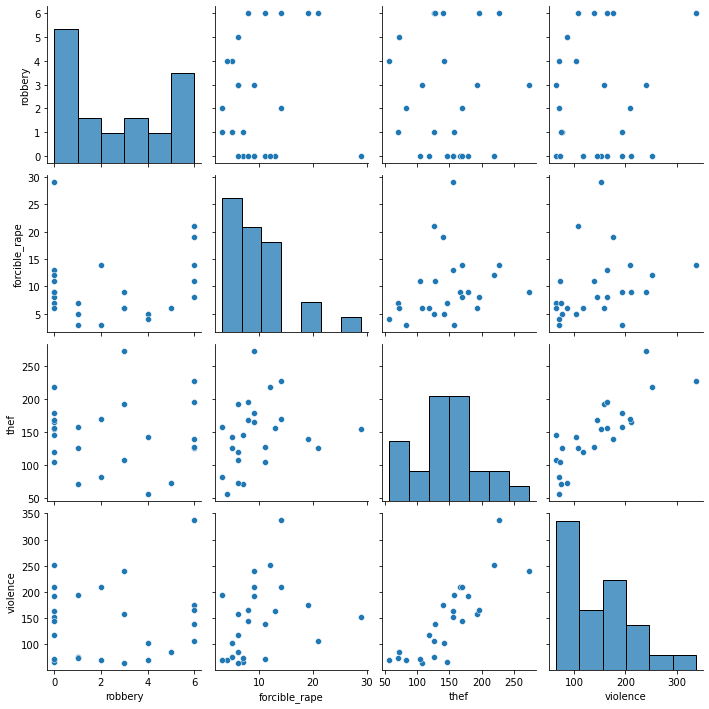

In [15]:
import seaborn as sns
sns.pairplot(nightlife_crime, vars=["robbery","forcible_rape","thef","violence"])

plt.show()

In [16]:
#피어슨 상관계수
nightlife_crime.describe().corr(method ="pearson")

,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,robbery_Tot,forcible_rape_Tot,thef_tot,violence_Tot
pub,1.000000,0.970083,0.983632,-0.259310,-0.068669,0.634218,0.868244,0.945580,0.213089,0.478374,0.835306,0.791467,0.730094
karaoke,0.970083,1.000000,0.991950,-0.333037,-0.164101,0.583731,0.923380,0.965513,0.130290,0.414613,0.854645,0.850261,0.804440
tot_nightlife,0.983632,0.991950,1.000000,-0.351762,-0.170221,0.570230,0.925130,0.980346,0.122601,0.411745,0.886894,0.864819,0.815507
murder,-0.259310,-0.333037,-0.351762,1.000000,0.977292,0.566975,-0.473827,-0.408317,0.879891,0.677060,-0.502023,-0.590246,-0.623762
robbery,-0.068669,-0.164101,-0.170221,0.977292,1.000000,0.703720,-0.313427,-0.225744,0.953835,0.800903,-0.327102,-0.438979,-0.485447
forcible_rape,0.634218,0.583731,0.570230,0.566975,0.703720,1.000000,0.409195,0.503809,0.879103,0.959893,0.342953,0.252204,0.180135
thef,0.868244,0.923380,0.925130,-0.473827,-0.313427,0.409195,1.000000,0.966061,-0.017363,0.314204,0.968078,0.981116,0.961586
violence,0.945580,0.965513,0.980346,-0.408317,-0.225744,0.503809,0.966061,1.000000,0.068315,0.377275,0.952049,0.932394,0.899946
murder_tot,0.213089,0.130290,0.122601,0.879891,0.953835,0.879103,-0.017363,0.068315,1.000000,0.941768,-0.047985,-0.160311,-0.218907
robbery_Tot,0.478374,0.414613,0.411745,0.677060,0.800903,0.959893,0.314204,0.377275,0.941768,1.000000,0.282507,0.177659,0.114249


<AxesSubplot:>

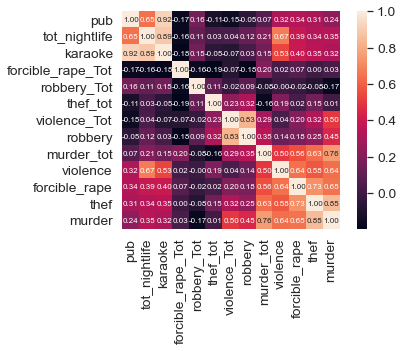

In [17]:
sns.set(font_scale=1.25)
data = nightlife_crime.corr()
cols = data.nlargest(13, 'pub').index # nlargest : Return this many descending sorted values
#sns.heatmap(data = nightlife_crime.corr(method = 'pearson'),linewidths=.5,cmap="RdGy")
hm = sns.heatmap(data, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
hm